# Twin US births in 1989-1991.
Raw data is taken from here:
http://www.nber.org/data/linked-birth-infant-death-data-vital-statistics-data.html
Specifically these files:
http://www.nber.org/lbid/1989/linkco1989us_den.csv.zip
http://www.nber.org/lbid/1990/linkco1990us_den.csv.zip
http://www.nber.org/lbid/1991/linkco1991us_den.csv.zip

The dataset guide is available here:
http://www.nber.org/lbid/docs/LinkCO89Guide.pdf

The dataset idea is based on the paper:
Almond, Douglas, Kenneth Y. Chay, and David S. Lee. "The costs of low birth weight." 
The Quarterly Journal of Economics 120.3 (2005): 1031-1083.

- twin_pairs_X_3years_samesex.csv includes 50 covariates for the twin pair such as mother
and father age and education, health complications and so on. The features which are 
different between the pair such as sex and birth order are denoted with _0 and _1 for 
the lighter and heavier twin, respectively.

- twin_pairs_T_3years_samesex.csv includes the birth weights in grams of both twins in the 
pair, dbirt_0 and dbirt_1. The lightest always first. I removed all pairs with exactly 
the same weight.

- twin_pairs_Y_3years_samesex.csv includes the mortality outcome for both twins, mort_0 
and mort_1.

- covar_types.txt indicates for each of the column in twin_pairs_X.csv whether it is binary
(e.g. married mom), ordinal (e.g. age mom), categorical (e.g. state of birth), or cyclical 
(just one: month of birth).

In [30]:
import os, sys
import pandas as pd
import numpy as np
import json

In [52]:
T = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_T_3years_samesex.csv")
X = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_X_3years_samesex.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/TWINS/twin_pairs_Y_3years_samesex.csv")

In [42]:
with open("./TWINS/covar_desc.txt") as f:
    XDesc = json.loads(f.read())

In [55]:
X.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'pldel', 'birattnd', 'brstate',
       'stoccfipb', 'mager8', 'ormoth', 'mrace', 'meduc6', 'dmar', 'mplbir',
       'mpre5', 'adequacy', 'orfath', 'frace', 'birmon', 'gestat10', 'csex',
       'anemia', 'cardiac', 'lung', 'diabetes', 'herpes', 'hydra', 'hemo',
       'chyper', 'phyper', 'eclamp', 'incervix', 'pre4000', 'preterm', 'renal',
       'rh', 'uterine', 'othermr', 'tobacco', 'alcohol', 'cigar6', 'drink5',
       'crace', 'data_year', 'nprevistq', 'dfageq', 'feduc6', 'infant_id_0',
       'infant_id_1', 'dlivord_min', 'dtotord_min', 'bord_0', 'bord_1',
       'brstate_reg', 'stoccfipb_reg', 'mplbir_reg'],
      dtype='object')

In [54]:
Y.columns

Index(['Unnamed: 0', 'mort_0', 'mort_1'], dtype='object')

In [56]:
T.columns

Index(['Unnamed: 0', 'dbirwt_0', 'dbirwt_1'], dtype='object')

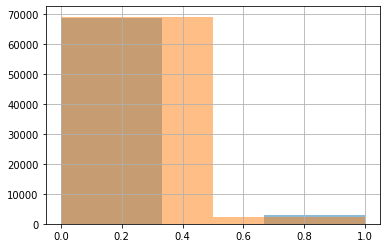

In [65]:
Y['mort_0'].hist(bins=3, alpha=0.5)
Y['mort_1'].hist(bins=2, alpha=0.5)

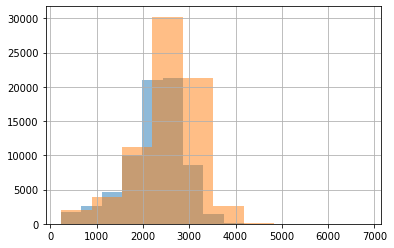

In [69]:
T['dbirwt_0'].hist(alpha=0.5)
T['dbirwt_1'].hist(alpha=0.5)